### EDA

In [ ]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import re
import string
from collections import Counter
import plotly.express as px
from nltk.corpus import stopwords
import spacy

In [ ]:
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


In [ ]:
df_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
df_train.tail()

,textID,text,selected_text,sentiment
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral


In [ ]:
df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
temp = df_train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text', ascending=False)
temp

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


<Axes: xlabel='sentiment', ylabel='count'>

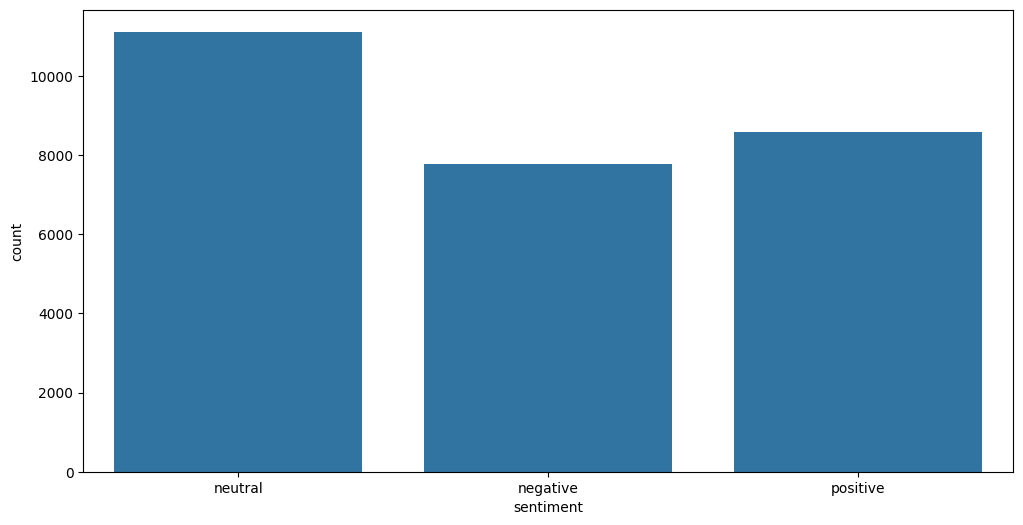

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='sentiment', data=df_train)

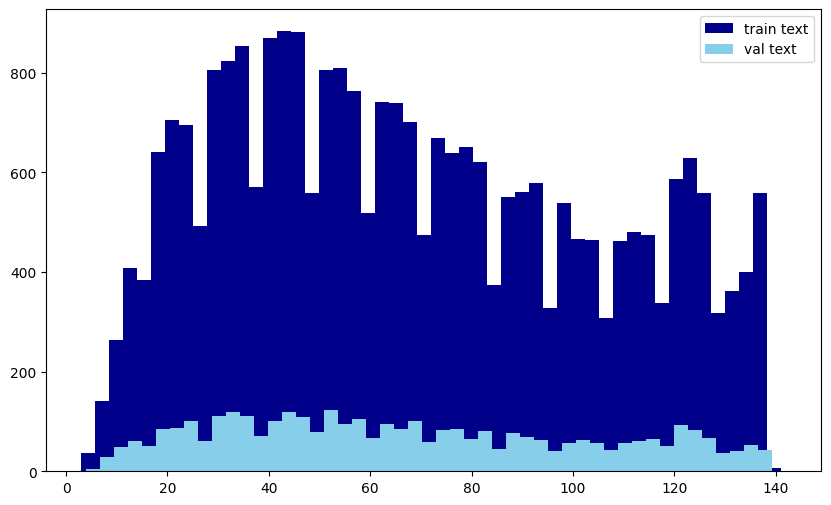

In [ ]:
length_train = df_train['text'].str.len()
length_val = df_test['text'].str.len()
plt.figure(figsize=(10,6))
plt.hist(length_train, bins=50, label="train text", color = "darkblue")
plt.hist(length_val, bins=50, label='val text', color = "skyblue")
plt.legend()

In [ ]:
df_train.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [ ]:
df_test.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [ ]:
df_train.dropna(inplace=True)

In [ ]:
print("First Row in the Training Dataset:")
print(df_train.iloc[0])

print('-' * 30)

matching_rows = len(df_train[df_train['text'] == df_train['selected_text']])
print(f"Number of Matching Rows: {matching_rows}")

First Row in the Training Dataset:
textID                                     cb774db0d1
text              I`d have responded, if I were going
selected_text     I`d have responded, if I were going
sentiment                                     neutral
Name: 0, dtype: object
------------------------------
Number of Matching Rows: 7283


In [ ]:
blanks_train = []

for i, tid, t, tst, snt in df_train.itertuples():
    if type(t) == str and t.isspace():
        blanks_train.append(i)

if len(blanks_train) > 0:
    print(len(blanks_train))
    df_train.drop(blanks_train, inplace=True)

In [ ]:
blanks_test = []

for i, tid, t, snt in df_test.itertuples():
    if type(t) == str and t.isspace():
        blanks_test.append(i)

if len(blanks_test) > 0:
    print(len(blanks_test))
    df_train.drop(blanks_test, inplace=True)

In [ ]:
from scipy import stats

df_train['text_length'] = df_train['text'].apply(lambda t: len(str(t)))

positive_text_lengths = df_train[df_train['sentiment'] == 'positive']['text_length']
negative_text_lengths = df_train[df_train['sentiment'] == 'negative']['text_length']
neutral_text_lengths = df_train[df_train['sentiment'] == 'neutral']['text_length']

f_statistic, p_value = stats.f_oneway(positive_text_lengths, negative_text_lengths, neutral_text_lengths)

print("ANOVA Test Results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("The means of at least two groups are significantly different.")
else:
    print("There is no significant difference in the means of the groups.")

ANOVA Test Results:
F-statistic: 72.2127709711816
P-value: 5.254438748898152e-32
The means of at least two groups are significantly different.


### Preprocess

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_train.head()

,textID,text,selected_text,sentiment,text_length
0,cb774db0d1,"I`d responded, I going","I`d have responded, if I were going",neutral,36
1,549e992a42,Sooo SAD I miss San Diego!!!,Sooo SAD,negative,46
2,088c60f138,boss bullying me...,bullying me,negative,25
3,9642c003ef,interview! leave alone,leave me alone,negative,31
4,358bd9e861,"Sons ****, couldn`t put releases already bought","Sons of ****,",negative,75


In [ ]:
df_test.head()

,textID,text,sentiment
0,f87dea47db,Last session day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai also really exciting (precisely -- sk...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, quit compa...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)

train_vectors = vectorizer.fit_transform(df_train['text'])
test_vectors = vectorizer.transform(df_test['text'])

In [ ]:
X_train = train_vectors
y_train = df_train['sentiment']

X_test = test_vectors
y_test = df_test['sentiment']

Data dipreproses dengan dilakukan stopword handling lalu dilakukan vectorize, data lalu displit

### Machine Learning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB

model_svm = svm.SVC()
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

def show_metrics(y_true, y_pred, grid=None):
    print(classification_report(y_true, y_pred))
    print('-' * 30)
    print(confusion_matrix(y_true, y_pred))

    if grid:
        print('-' * 30)
        print(grid.best_params_)

In [ ]:
y_pred_nb = model_mnb.predict(X_test)

show_metrics(y_test, y_pred_nb)

              precision    recall  f1-score   support

    negative       0.72      0.47      0.57      1001
     neutral       0.55      0.75      0.63      1430
    positive       0.73      0.60      0.66      1103

    accuracy                           0.62      3534
   macro avg       0.66      0.61      0.62      3534
weighted avg       0.65      0.62      0.62      3534

------------------------------
[[ 473  480   48]
 [ 153 1076  201]
 [  33  411  659]]


In [ ]:
y_pred_svm = model_svm.predict(X_test)

show_metrics(y_test, y_pred_svm)

              precision    recall  f1-score   support

    negative       0.75      0.51      0.61      1001
     neutral       0.58      0.81      0.68      1430
    positive       0.82      0.65      0.72      1103

    accuracy                           0.67      3534
   macro avg       0.72      0.66      0.67      3534
weighted avg       0.71      0.67      0.67      3534

------------------------------
[[ 508  464   29]
 [ 145 1160  125]
 [  25  364  714]]


In [ ]:
def infer_sentiment(text, model, vectorizer):

    text_vector = vectorizer.transform([text])
    sentiment = model.predict(text_vector)

    return sentiment

In [ ]:
text = "Sooo SAD I miss San Diego!!!"
sentiment_svm = infer_sentiment(text, model_svm, vectorizer)
sentiment_mnb = infer_sentiment(text, model_mnb, vectorizer)

print(f"Sentimen SVM: {sentiment_svm[0]}")
print(f"Sentimen Multinomial NB: {sentiment_mnb[0]}")

Sentimen SVM: negative
Sentimen Multinomial NB: negative


Dari hasil metrik yang dihasilkan didapat nilai akurasi 0.67 oleh svm, dan 0.62 oleh multinomialNb. skor masih kurang jadi bisa dilakukan tuning parameter

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm.SVC(), param_grid_svm, refit=True, verbose=2)
grid_svm.fit(X_train, y_train)

param_grid_mnb = {'alpha': [0.1, 0.5, 1, 2, 5]}
grid_mnb = GridSearchCV(MultinomialNB(), param_grid_mnb, refit=True, verbose=2)
grid_mnb.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   6.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   6.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   4.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   7.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  12.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.6s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   4.9s
[CV] END ....................C=0.1, gamma=0.1, 

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1, 2, 5]}, verbose=2)

In [ ]:
best_model_svm = grid_svm.best_estimator_
best_params_svm = grid_svm.best_params_

best_model_mnb = grid_mnb.best_estimator_
best_params_mnb = grid_mnb.best_params_

In [ ]:
y_pred_nb_best = best_model_mnb.predict(X_test)

show_metrics(y_test, y_pred_nb_best)

              precision    recall  f1-score   support

    negative       0.72      0.47      0.57      1001
     neutral       0.55      0.75      0.63      1430
    positive       0.73      0.60      0.66      1103

    accuracy                           0.62      3534
   macro avg       0.66      0.61      0.62      3534
weighted avg       0.65      0.62      0.62      3534

------------------------------
[[ 473  480   48]
 [ 153 1076  201]
 [  33  411  659]]


In [ ]:
y_pred_svm_best = best_model_svm.predict(X_test)

show_metrics(y_test, y_pred_svm_best)

              precision    recall  f1-score   support

    negative       0.70      0.56      0.62      1001
     neutral       0.60      0.76      0.67      1430
    positive       0.79      0.67      0.73      1103

    accuracy                           0.67      3534
   macro avg       0.70      0.66      0.67      3534
weighted avg       0.69      0.67      0.67      3534

------------------------------
[[ 556  405   40]
 [ 194 1084  152]
 [  45  318  740]]


In [ ]:
text = "Sooo SAD I miss San Diego!!!"
sentiment_svm = infer_sentiment(text, best_model_svm, vectorizer)
sentiment_mnb = infer_sentiment(text, best_model_mnb, vectorizer)

print(f"Sentimen SVM: {sentiment_svm[0]}")
print(f"Sentimen Multinomial NB: {sentiment_mnb[0]}")

Sentimen SVM: negative
Sentimen Multinomial NB: negative


### Deep Learning

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout, Attention, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
max_len = 32
num_words = 500

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df_train['text'])

In [ ]:
X_train = df_train['text']
y_train = df_train['sentiment']

X_test = df_test['text']
y_test = df_test['sentiment']

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
y_train = pd.get_dummies(y_train, drop_first=True, dtype=int).to_numpy()
y_test = pd.get_dummies(y_test, drop_first=True, dtype=int).to_numpy()

In [ ]:
# RNN
def rnn(units, dropout_rate):
    model = Sequential()
    model.add(Embedding(num_words, 128, input_length=max_len))
    model.add(SimpleRNN(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='sigmoid'))
    return model

# LSTM
def lstm(units, dropout_rate):
    model = Sequential()
    model.add(Embedding(num_words, 32, input_length=max_len))
    model.add(LSTM(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='sigmoid'))
    return model

# GRU
def gru(units, dropout_rate):
    model = Sequential()
    model.add(Embedding(num_words, 32, input_length=max_len))
    model.add(GRU(units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2, activation='sigmoid'))
    return model

In [ ]:
units = 128
dropout_rate = 0.3

In [ ]:
# RNN
rnn_model = rnn(units, dropout_rate)
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# LSTM
lstm_model = lstm(units, dropout_rate)
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# GRU
gru_model = gru(units, dropout_rate)
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [ ]:
# RNN
rnn_history = rnn_model.fit(X_train_padded, y_train, epochs=20, batch_size=128,
                            validation_split=0.2, callbacks=[early_stopping])

# LSTM
lstm_history = lstm_model.fit(X_train_padded, y_train, epochs=20, batch_size=128,
                              validation_split=0.2, callbacks=[early_stopping])

# GRU
gru_history = gru_model.fit(X_train_padded, y_train, epochs=20, batch_size=128,
                            validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
172/172 [==============================] - 10s 51ms/step - loss: 0.5940 - accuracy: 0.5262 - val_loss: 0.4840 - val_accuracy: 0.7012
Epoch 2/20
172/172 [==============================] - 11s 66ms/step - loss: 0.6114 - accuracy: 0.5232 - val_loss: 0.4841 - val_accuracy: 0.7012
Epoch 3/20
172/172 [==============================] - 12s 68ms/step - loss: 0.6092 - accuracy: 0.5187 - val_loss: 0.4869 - val_accuracy: 0.7012
Epoch 4/20
172/172 [==============================] - 7s 42ms/step - loss: 0.5957 - accuracy: 0.5302 - val_loss: 0.4846 - val_accuracy: 0.7012
Epoch 1/20
172/172 [==============================] - 21s 104ms/step - loss: 0.5789 - accuracy: 0.5363 - val_loss: 0.4843 - val_accuracy: 0.7012
Epoch 2/20
172/172 [==============================] - 17s 99ms/step - loss: 0.5996 - accuracy: 0.5268 - val_loss: 0.4842 - val_accuracy: 0.7012
Epoch 3/20
172/172 [==============================] - 17s 99ms/step - loss: 0.5949 - accuracy: 0.5264 - val_loss: 0.4840 - val_accuracy:

In [ ]:
rnn_val_acc = max(rnn_history.history['val_accuracy'])
lstm_val_acc = max(lstm_history.history['val_accuracy'])
gru_val_acc = max(gru_history.history['val_accuracy'])
max_val_acc = max(rnn_val_acc, lstm_val_acc, gru_val_acc)


print("RNN Validation Accuracy:", rnn_val_acc)
print("LSTM Validation Accuracy:", lstm_val_acc)
print("GRU Validation Accuracy:", gru_val_acc)
print('-' * 50)
print("Max Validation Accuracy:", max_val_acc)

RNN Validation Accuracy: 0.7012372612953186
LSTM Validation Accuracy: 0.7012372612953186
GRU Validation Accuracy: 0.829512357711792
--------------------------------------------------
Max Validation Accuracy: 0.829512357711792


In [ ]:
def predict_sentiment(text, model, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, maxlen=max_length)
    prediction = model.predict(padded_sequences)

    predicted_class = np.argmax(prediction)
    if predicted_class == 0:
        sentiment = "Negatif"
        print(sentiment)
    elif predicted_class == 1:
        sentiment = "Netral"
        print(sentiment)
    else:
        sentiment = "Positif"
        print(sentiment)

    return sentiment

In [ ]:
text ="Sooo SAD I miss San Diego!!!"
max_length = X_train_padded.shape[1]

rnn_sentiment = predict_sentiment(text, rnn_model, tokenizer, max_length)
lstm_sentiment = predict_sentiment(text, lstm_model, tokenizer, max_length)
gru_sentiment = predict_sentiment(text, gru_model, tokenizer, max_length)


1/1 [==============================] - 0s 23ms/step
Negatif
1/1 [==============================] - 0s 24ms/step
Negatif
1/1 [==============================] - 0s 21ms/step
Negatif


Menggunakan beberapa model deeplearning seperti vanilla rnn, lstm dan gru didapat skor akurasi 0.7 dan 0.82, yang mana paling bagus ada di gru.